## Análise de Drogas por Idade

#####  *  Seguimentação de usuários de drogas por idade
#####  *  dataset = https://www.kaggle.com/datasets/tunguz/drug-use-by-age

In [3]:
# Instalação dos pacotes
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

In [76]:
# Verificação das versões dos pacotes usados nesse código
%reload_ext watermark
%watermark -a "Maria Eduarda - Data Science" --iversions

Author: Maria Eduarda - Data Science

seaborn   : 0.11.2
sys       : 3.9.2 (tags/v3.9.2:1a79785, Feb 19 2021, 13:44:55) [MSC v.1928 64 bit (AMD64)]
sklearn   : 1.0.2
pandas    : 1.2.3
numpy     : 1.20.2
matplotlib: 3.4.2



In [6]:
# Importar dataset
drogas = pd.read_csv('dados/drugs.csv')
drogas.shape

(17, 28)

##### Análise Exploratória

In [7]:
drogas.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [8]:
drogas.nunique

<bound method DataFrame.nunique of       age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0      12  2798          3.9                3.0            1.1   
1      13  2757          8.5                6.0            3.4   
2      14  2792         18.1                5.0            8.7   
3      15  2956         29.2                6.0           14.5   
4      16  3058         40.1               10.0           22.5   
5      17  3038         49.3               13.0           28.0   
6      18  2469         58.7               24.0           33.7   
7      19  2223         64.6               36.0           33.4   
8      20  2271         69.7               48.0           34.0   
9      21  2354         83.2               52.0           33.0   
10  22-23  4707         84.2               52.0           28.4   
11  24-25  4591         83.1               52.0           24.9   
12  26-29  2628         80.7               52.0           20.8   
13  30-34  2864         77.5             

In [9]:
# Tratando colunas
for coluna in drogas:
    drogas[coluna] = drogas[coluna].replace('-','0')

In [10]:
# Mudaça de object para float
drogas['cocaine-frequency'] = drogas['cocaine-frequency'].astype('float')
drogas['crack-frequency'] = drogas['cocaine-frequency'].astype('float')
drogas['heroin-frequency'] = drogas['heroin-frequency'].astype('float')
drogas['inhalant-frequency'] = drogas['inhalant-frequency'].astype('float')
drogas['oxycontin-frequency'] = drogas['oxycontin-frequency'].astype('float')
drogas['meth-frequency'] = drogas['meth-frequency'].astype('float')

In [11]:
drogas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      17 non-null     object 
 1   n                        17 non-null     int64  
 2   alcohol-use              17 non-null     float64
 3   alcohol-frequency        17 non-null     float64
 4   marijuana-use            17 non-null     float64
 5   marijuana-frequency      17 non-null     float64
 6   cocaine-use              17 non-null     float64
 7   cocaine-frequency        17 non-null     float64
 8   crack-use                17 non-null     float64
 9   crack-frequency          17 non-null     float64
 10  heroin-use               17 non-null     float64
 11  heroin-frequency         17 non-null     float64
 12  hallucinogen-use         17 non-null     float64
 13  hallucinogen-frequency   17 non-null     float64
 14  inhalant-use             17 

In [12]:
# Soma de valores nulos
drogas.isna().sum()

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          0
crack-use                  0
crack-frequency            0
heroin-use                 0
heroin-frequency           0
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         0
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        0
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             0
sedative-use               0
sedative-frequency         0
dtype: int64

In [13]:
# Métricas básicas
drogas.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.411765,0.294118,7.411765,0.352941,...,0.935294,13.941176,2.805882,11.735294,1.917647,31.147059,0.382353,31.735294,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.014119,0.235772,8.014119,0.333762,...,0.608216,12.902134,1.753379,11.485205,1.407673,85.973790,0.262762,32.206423,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,5.000000,0.100000,...,0.400000,5.000000,1.400000,6.000000,0.600000,7.000000,0.200000,10.500000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.000000,0.400000,5.000000,0.200000,...,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,24.000000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.000000,0.500000,7.000000,0.600000,...,1.400000,17.500000,4.200000,11.000000,3.000000,12.000000,0.600000,46.000000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,36.000000,1.100000,...,1.700000,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000


In [14]:
drogas.columns

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency'],
      dtype='object')

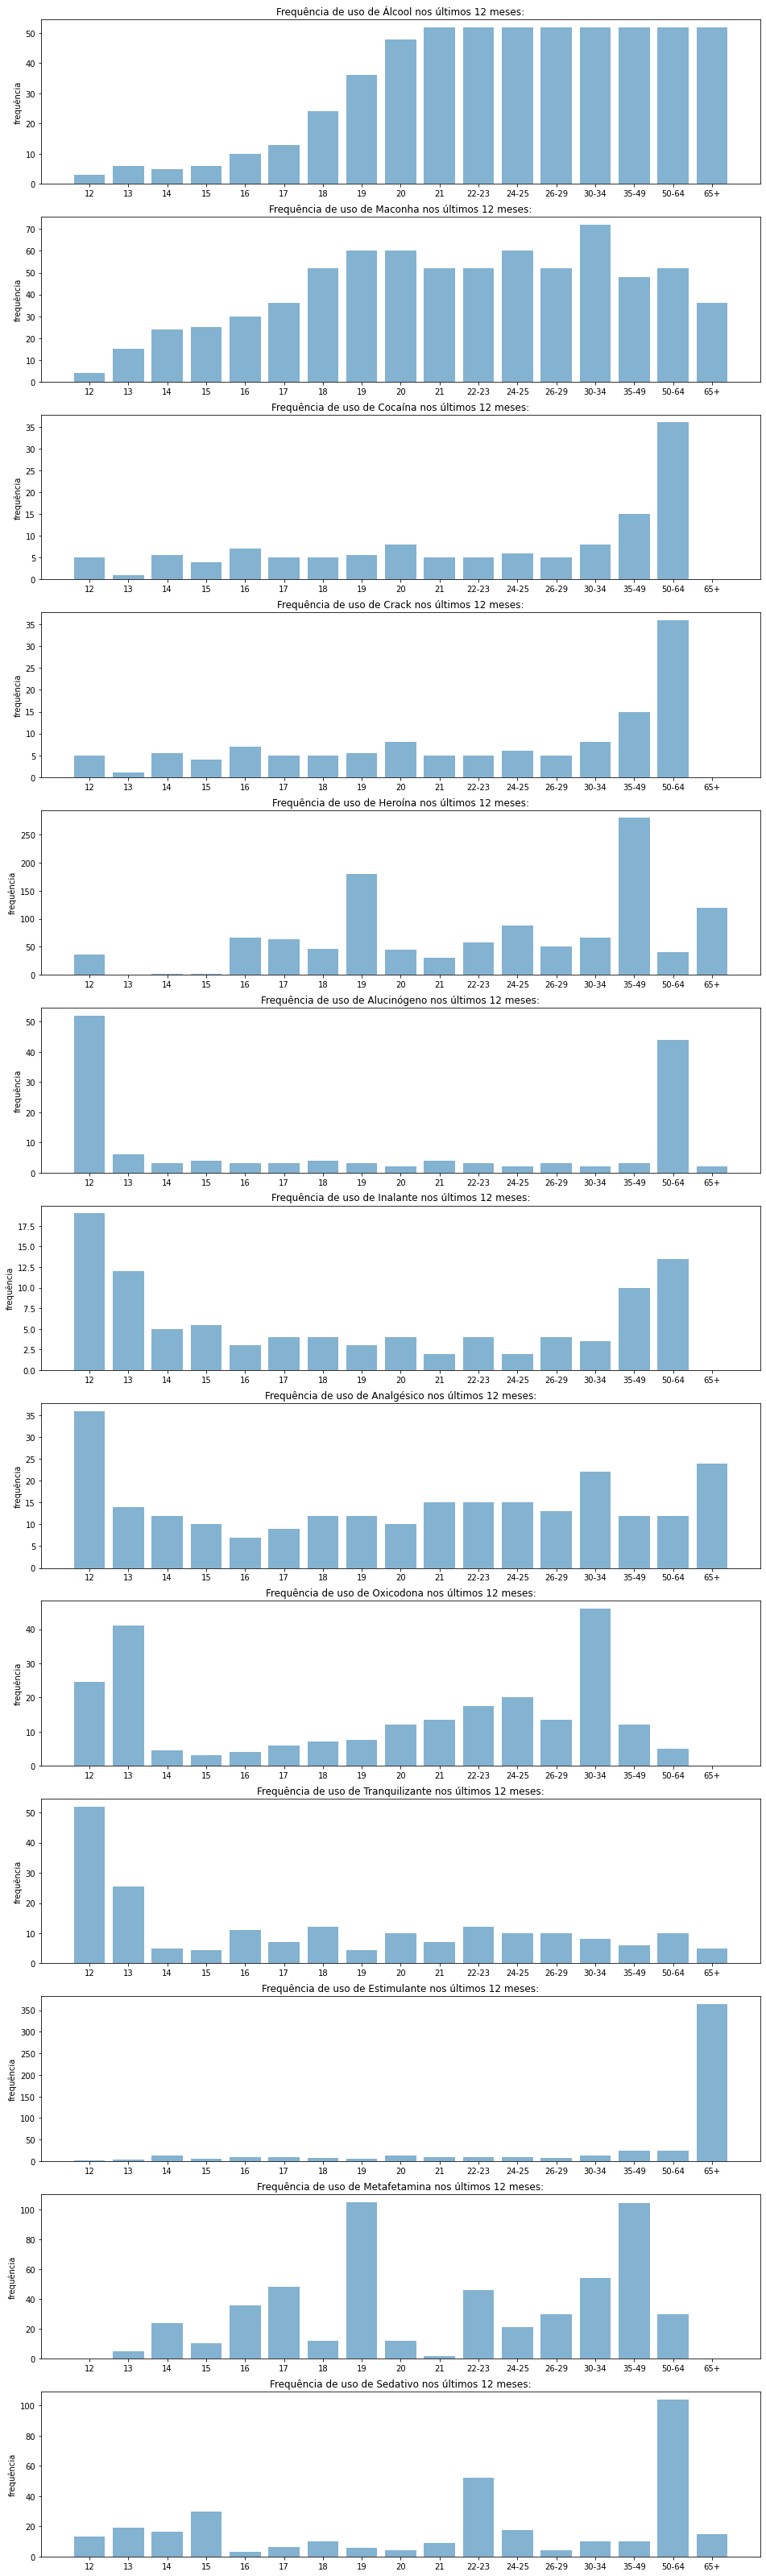

In [82]:
# Análise da frequência do uso de cada tipo de droga por idade
# Plotagem de vários gráficos
#%%time
figure,axis = plt.subplots(13,1,figsize=(16,50))
num = 0
lista_drogas = ['Álcool','Maconha', 'Cocaína','Crack', 'Heroína', 'Alucinógeno', 'Inalante',
            'Analgésico', 'Oxicodona','Tranquilizante','Estimulante', 'Metafetamina','Sedativo'] 
lista_frequencia_drogas = ['alcohol-frequency','marijuana-frequency', 'cocaine-frequency','crack-frequency', 
              'heroin-frequency', 'hallucinogen-frequency', 'inhalant-frequency',
            'pain-releiver-frequency', 'oxycontin-frequency','tranquilizer-frequency',
            'stimulant-frequency', 'meth-frequency','sedative-frequency']
import numpy as np

# Loop pelas coluas
for droga in lista_frequencia_drogas:
    #plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    axis[num].bar(drogas['age'], drogas[droga],color=(0.2, 0.5, 0.7, 0.6)) 
    axis[num].set_ylabel('frequência')
    axis[num].set_title('Frequência de uso de {} nos últimos 12 meses:'.format(lista_drogas[num]))
    plt.subplots_adjust(top = 1) # ajusta altura dos subpots
    num += 1
plt.show()

<AxesSubplot:>

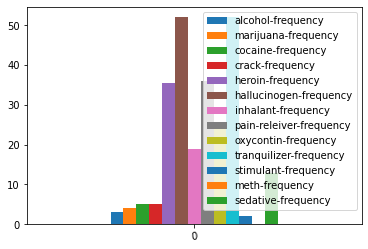

In [17]:
# Teste plotagem em barra direto do df
drogas[['alcohol-frequency','marijuana-frequency', 'cocaine-frequency','crack-frequency', 
              'heroin-frequency', 'hallucinogen-frequency', 'inhalant-frequency',
            'pain-releiver-frequency', 'oxycontin-frequency','tranquilizer-frequency',
            'stimulant-frequency', 'meth-frequency','sedative-frequency']][drogas['age'] == '12'].plot.bar(rot=5)

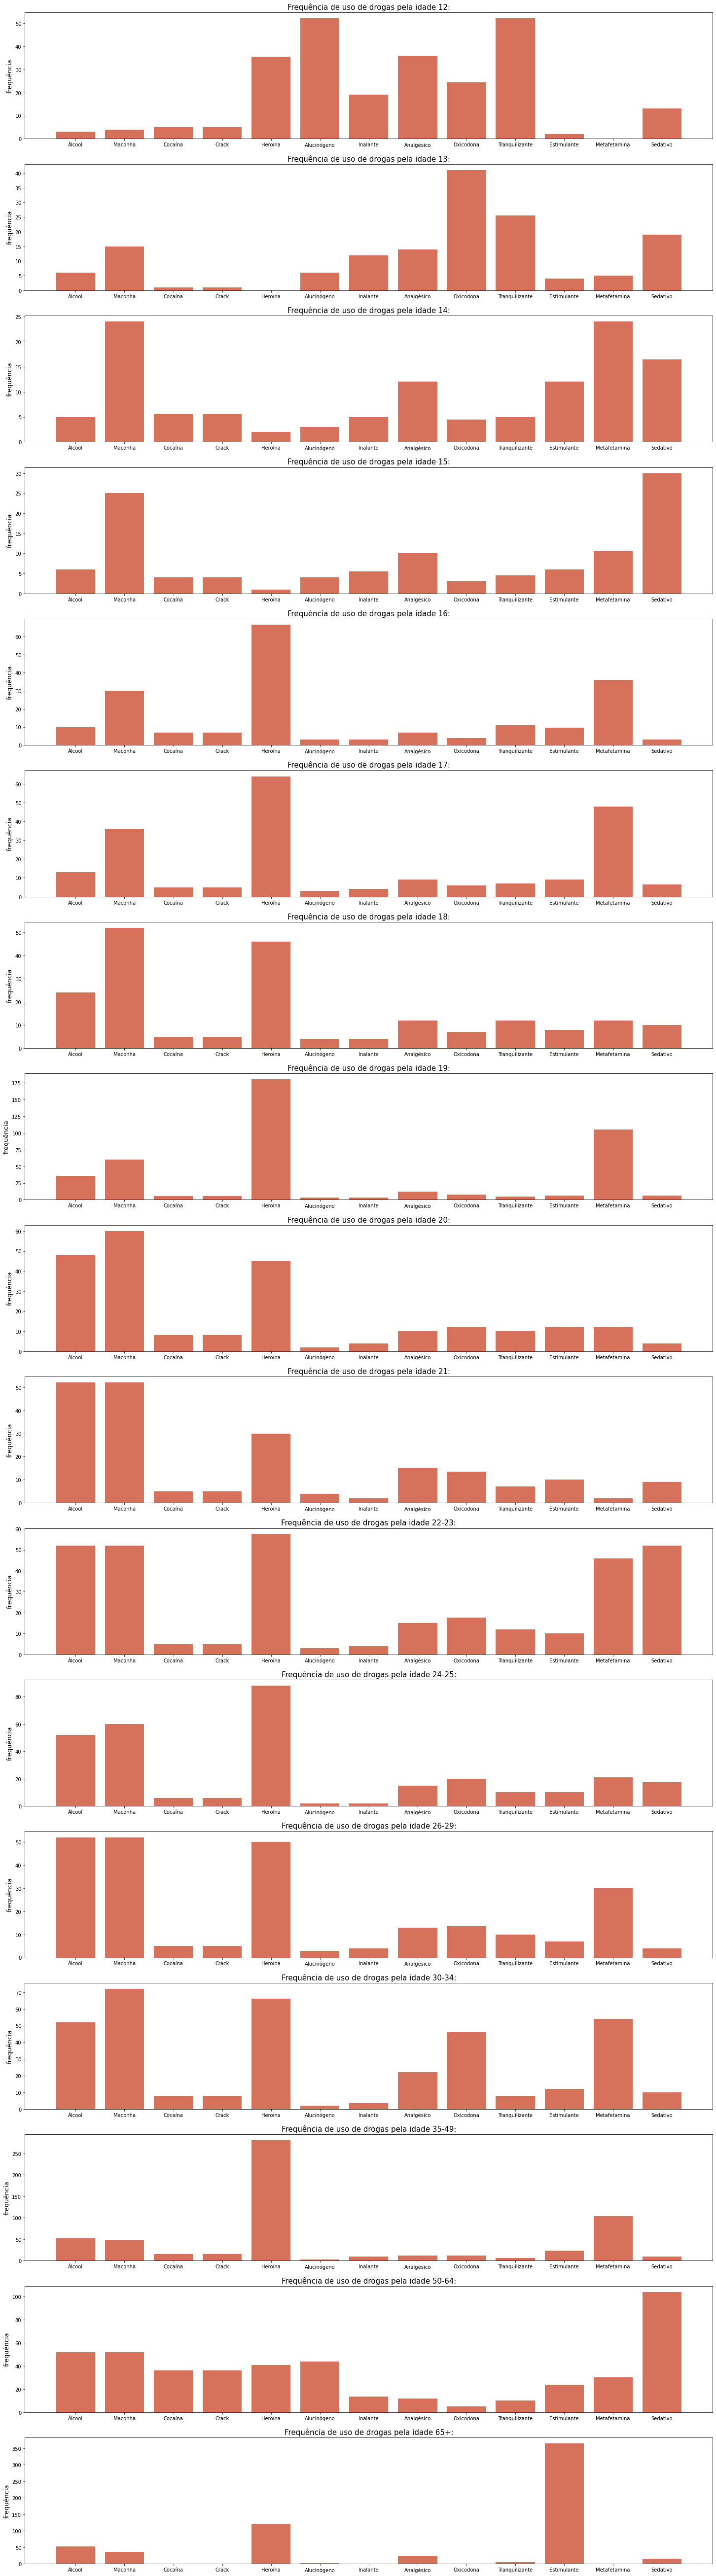

In [83]:
from numpy import array

# Tamanho da plotagem
figure,axis = plt.subplots(17,1,figsize=(25,25))

# Contador
num = 0

# Loop para trazer o registro de drogas de cada idade
for idade in drogas['age']:
    idade_especifica= drogas[['alcohol-frequency','marijuana-frequency', 'cocaine-frequency','crack-frequency', 
                'heroin-frequency', 'hallucinogen-frequency', 'inhalant-frequency',
                'pain-releiver-frequency', 'oxycontin-frequency','tranquilizer-frequency',
                'stimulant-frequency', 'meth-frequency','sedative-frequency']][drogas['age'] == idade]
    
    # Extrai os valores da linha do df da idade_especifica
    lista_idade_especifica = []
    for index, linhas in idade_especifica.iterrows():
        for frequencia in lista_frequencia_drogas:
            lista_idade_especifica.append(linhas[frequencia])

    # Plotagem
    axis[num].bar(lista_drogas, lista_idade_especifica, color = (0.8, 0.3, 0.2, 0.8) ) # cor rgba https://rgbacolorpicker.com/
    axis[num].set_ylabel('frequência', fontsize = 13)
    axis[num].set_title('Frequência de uso de drogas pela idade {}:'.format(idade), fontsize = 15)
    plt.subplots_adjust(top = 3) # ajusta altura dos subpots
    num += 1
plt.show()

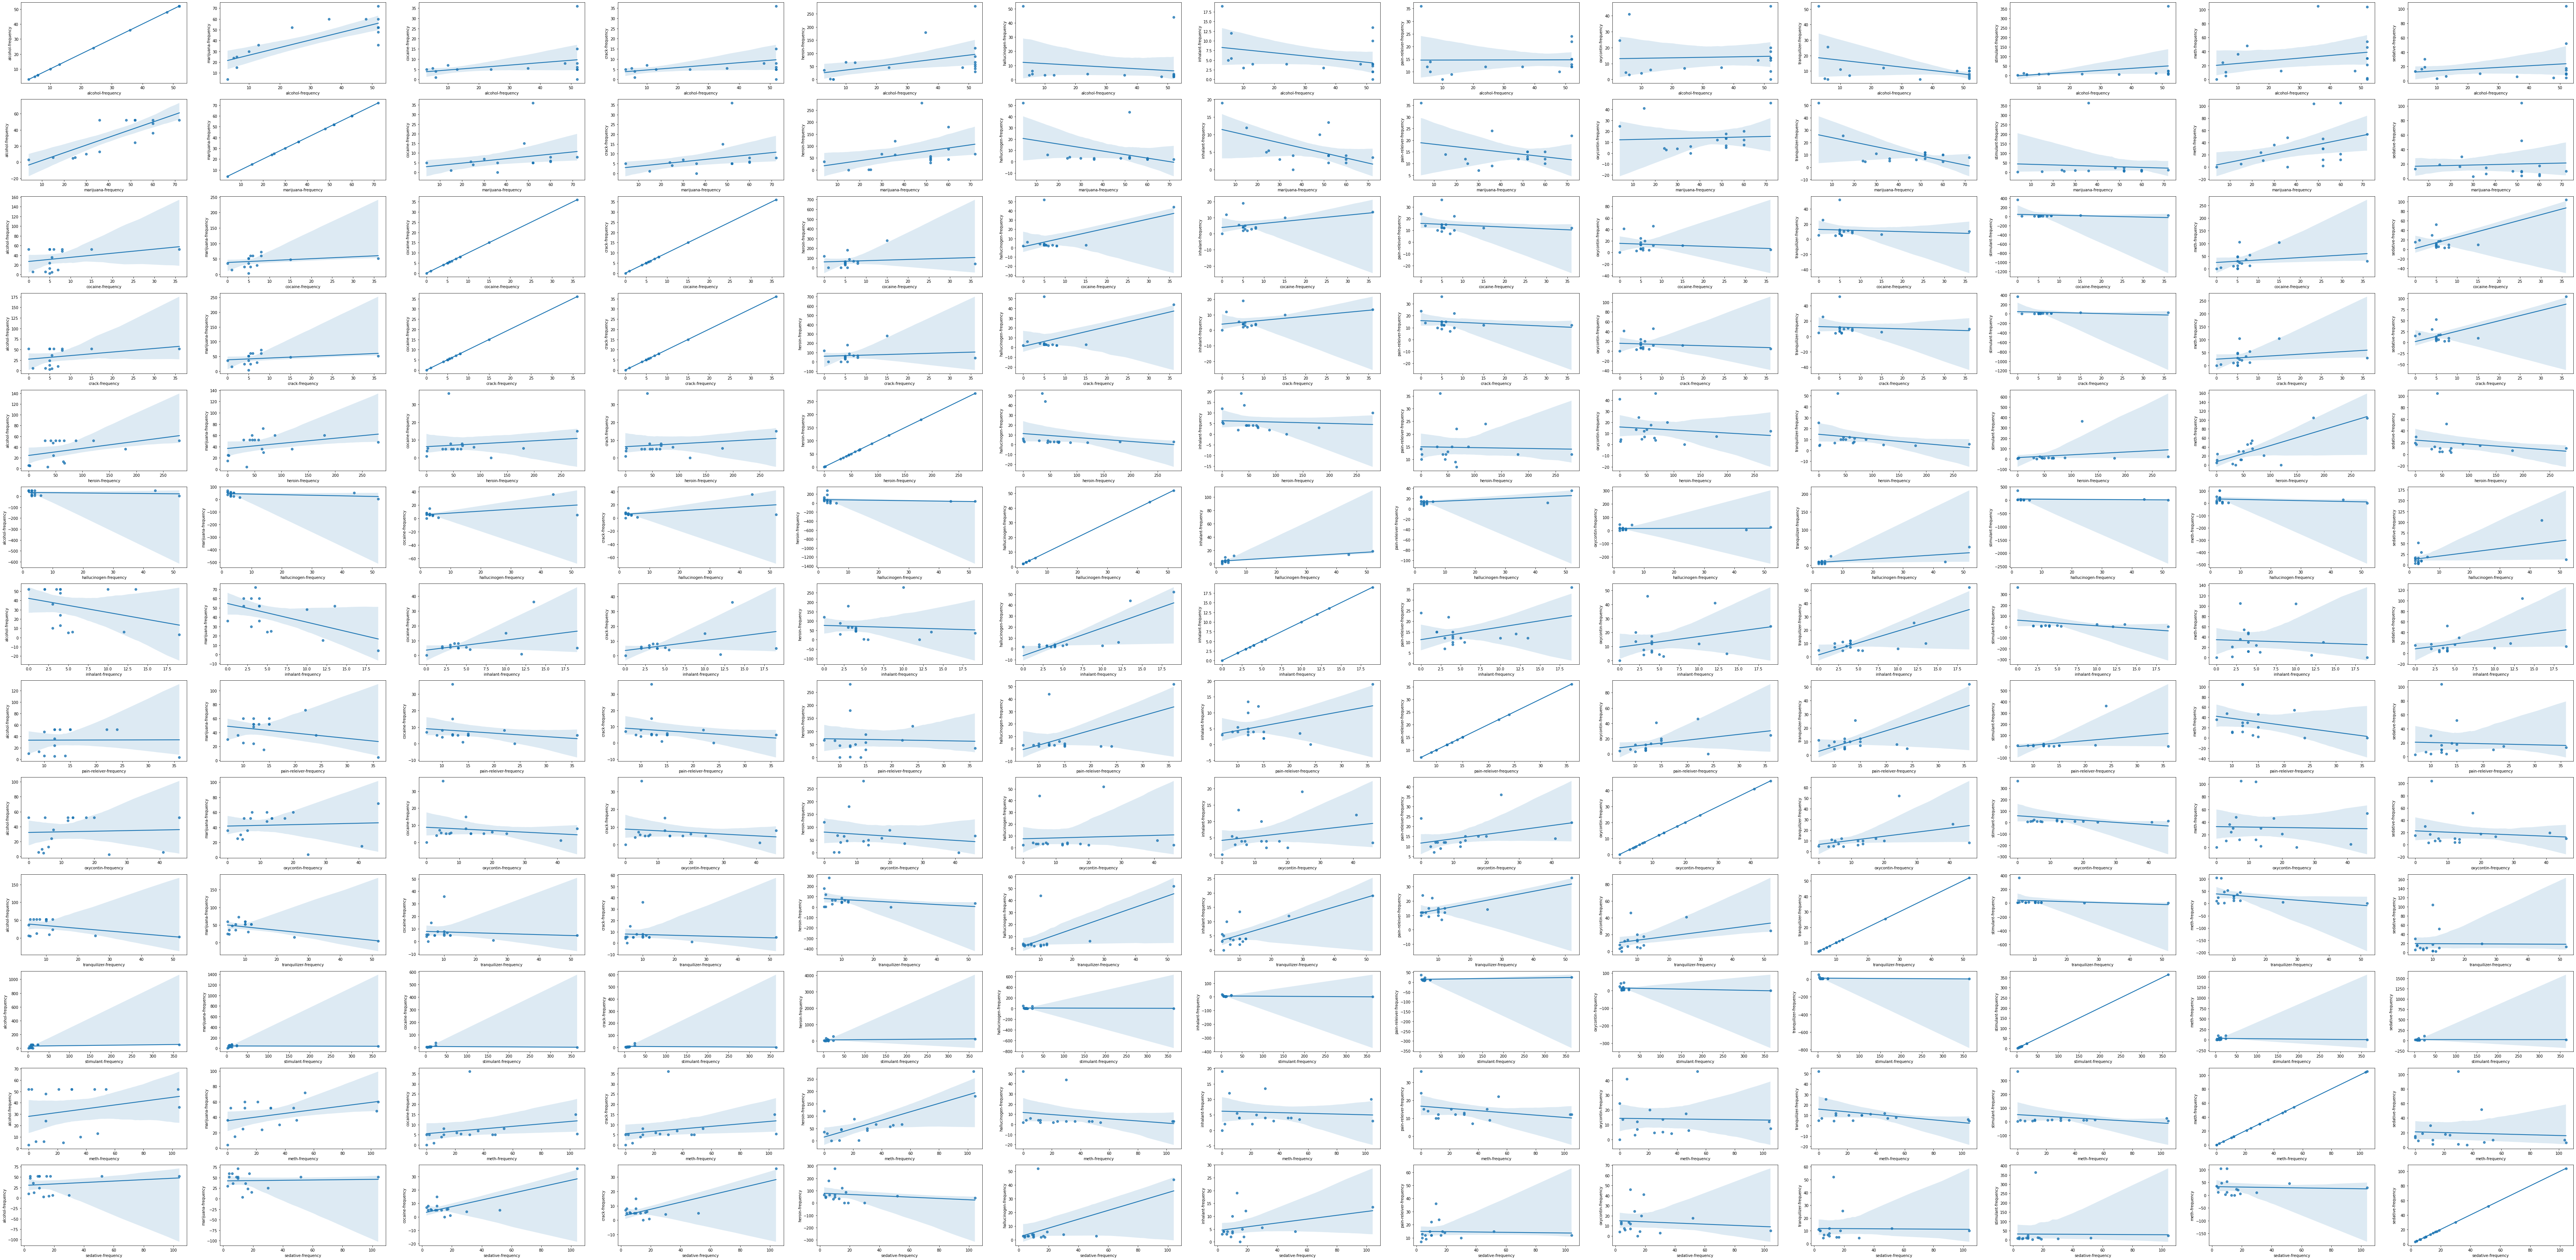

In [20]:
# Relação entre frequência de uso das drogas, onde NÃO há causalidade

# Tamanho da plotagem
plt.figure(1, figsize = (120, 60)) 

# Inicia contador
num = 0

# Loop pelos atributos
for x in lista_frequencia_drogas:
    for y in lista_frequencia_drogas:
        num += 1
        plt.subplot(13, 13, num) 
        #plt.subplots_adjust(hspace=0.1, wspace=0.1)
        sns.regplot(x = drogas[x], y = drogas[y], data = drogas)
        plt.ylabel(y)
plt.show()

#### Agrupamento

###### Nesse estudo foi escolhido apenas o clustering entre as drogas álcool e crack

In [21]:
alcool_e_crack = drogas[['alcohol-frequency','crack-frequency']].iloc[:,:].values # extrai dados de df em forma de array
alcool_e_crack

array([[ 3. ,  5. ],
       [ 6. ,  1. ],
       [ 5. ,  5.5],
       [ 6. ,  4. ],
       [10. ,  7. ],
       [13. ,  5. ],
       [24. ,  5. ],
       [36. ,  5.5],
       [48. ,  8. ],
       [52. ,  5. ],
       [52. ,  5. ],
       [52. ,  6. ],
       [52. ,  5. ],
       [52. ,  8. ],
       [52. , 15. ],
       [52. , 36. ],
       [52. ,  0. ]])

 Within Cluster Sum of Squares (WCSS), which measures the squared average distance of all the points within a cluster to the cluster centroid. To calculate WCSS, you first find the Euclidean distance (see figure below) between a given point and the centroid to which it is assigned. You then iterate this process for all points in the cluster, and then sum the values for the cluster and divide by the number of points. Finally, you calculate the average across all clusters. This will give you the average WCSS. https://opendatascience.com/unsupervised-learning-evaluating-clusters/#:~:text=To%20calculate%20WCSS%2C%20you%20first,by%20the%20number%20of%20points.

In [23]:
# Lista do wcss
wcss = []

In [24]:
# Loop para testar valores de K
for n in range(2, 11):
    modelo = (KMeans(n_clusters = n,
                    init = 'k-means++',
                    n_init = 10,
                     max_iter = 300, 
                     tol = 0.0001,  
                     random_state = 111, 
                     algorithm = 'elkan'))
    modelo.fit(alcool_e_crack)
    wcss.append(modelo.inertia_)

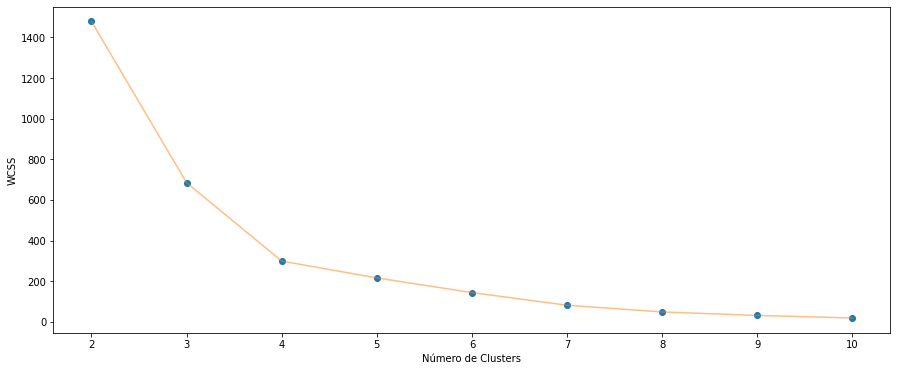

In [25]:
# Plotagem da relação entre quantidade de clusters e de wcss
plt.figure(1, figsize = (15,6))
plt.plot(np.arange(2,11), wcss, 'o')
plt.plot(np.arange(2,11), wcss, '-', alpha=0.5)
plt.xlabel('Número de Clusters'), plt.ylabel('WCSS')
plt.show()


#### Construindo modelo de agrupamento

In [26]:
# Criar modelo com 2 clusters
modelo_v1 = KMeans(
                n_clusters = 2,
                init = 'k-means++',
                n_init = 10,
                max_iter = 300,
                tol = 0.0001,
                random_state = 111,
                algorithm = 'elkan'
)

In [27]:
# Treina o modelo
modelo_v1.fit(alcool_e_crack)

KMeans(algorithm='elkan', n_clusters=2, random_state=111)

In [28]:
# Extração dos labels (rótulos de agrupamentos)
labels_1 = modelo_v1.labels_
labels_1

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
# Extração dos centroides
centroids_1 = modelo_v1.cluster_centers_
centroids_1

array([[50.        ,  9.35      ],
       [ 9.57142857,  4.64285714]])

### Visualização do agrupamento

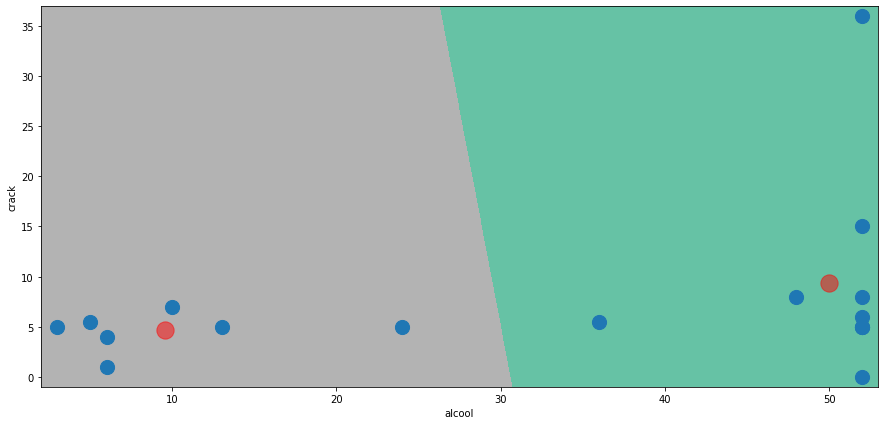

In [30]:
# Parâmetros do Meshgrid
h = 0.02
x_min, x_max = alcool_e_crack[:, 0].min() - 1, alcool_e_crack[:, 0].max() + 1
y_min, y_max = alcool_e_crack[:, 1].min() - 1, alcool_e_crack[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = modelo_v1.predict(np.c_[xx.ravel(), yy.ravel()]) 
plt.figure(1 , figsize = (15, 7) )
plt.clf()
Z = Z.reshape(xx.shape)

# Plot da imagem
plt.imshow(Z, 
           interpolation = 'nearest', 
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Set2, 
           aspect = 'auto', 
           origin = 'lower')

# Plot dos pontos de dados
plt.scatter( x = 'alcohol-frequency', y ='crack-frequency', data = drogas, s = 200 )
plt.scatter(x = centroids_1[: , 0], y =  centroids_1[: , 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('alcool')
plt.ylabel('crack')
plt.show()

In [48]:
# Une a coluna de clusters com as variáveis em um dataframe
df_clusters_alcool_crack = pd.DataFrame(data=[alcool_e_crack[:,0],alcool_e_crack[:,1],labels_1]).T
df_clusters_alcool_crack.columns = ['alcool','crack','clusters']
df_clusters_alcool_crack

,alcool,crack,clusters
0,3.0,5.0,1.0
1,6.0,1.0,1.0
2,5.0,5.5,1.0
3,6.0,4.0,1.0
4,10.0,7.0,1.0
5,13.0,5.0,1.0
6,24.0,5.0,1.0
7,36.0,5.5,0.0
8,48.0,8.0,0.0
9,52.0,5.0,0.0


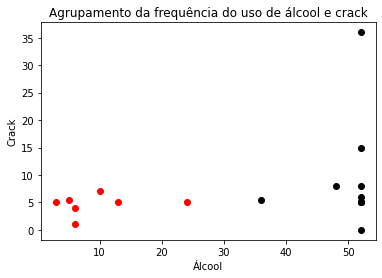

In [90]:
# Outro tipo de gráfico para visualização dos clusters
plt.scatter(x = df_clusters_alcool_crack['alcool'][df_clusters_alcool_crack['clusters'] == 1], 
            y = df_clusters_alcool_crack['crack'][df_clusters_alcool_crack['clusters'] == 1],
            color = 'red')
plt.scatter(x = df_clusters_alcool_crack['alcool'][df_clusters_alcool_crack['clusters'] == 0], 
            y = df_clusters_alcool_crack['crack'][df_clusters_alcool_crack['clusters'] == 0],
            color = 'black')
plt.xlabel('Álcool')
plt.ylabel('Crack')
plt.title('Agrupamento da frequência do uso de álcool e crack')
plt.show()